# Clustering Barcelona neighborhoods

### by Ian Riera Smolinska


This project is the final delivery for the [Applied Data Science Capstone](https://www.coursera.org/learn/applied-data-science-capstone) course. This course is the last one to complete the [IBM Data Science Professional Certificate](https://www.coursera.org/professional-certificates/ibm-data-science).

In addition to this notebook that presents the executed codes for the data obtention, analysis and modelling, you can acces to the following documents:
- [Presentation]()
- [Report]()
- [Blog]()


## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)



## Introduction: Business Problem <a name="introduction"></a>

The goal of this project is to cluster the neighborhoods of the city of **Barcelona** basing on demographic, economic and commercial characteristics to be able to understand the context of the city itself prior opening a business in it. 

Since the official statistics are usually objective, Foresquare will be used to obtain the commercial venues that people visited and rated in the application. 

As the administrative division splits the city in **10 districts**, the neighborhoods will be grouped in 10 different clusters basing on the mentioned parameters individually. Then the correlation between the different clusterings will be calculated to try and find out dependencies. 

Finally, taking into account all the parameters, a final division of the city will be applied to the city.

## Data <a name="data"></a>

The characteristics of the neighborhoods that will be analyzed can be obtain from the webpage of the **Barcelona's city council**:
* [Nationality](https://www.bcn.cat/estadistica/castella/dades/barris/tpob/pad/ine/a2019/ine17.htm.)
* [Unemployment](https://www.bcn.cat/estadistica/castella/dades/barris/ttreball/atur/durada/durbar19.htm.)
* [Local elections voting.](https://www.bcn.cat/estadistica/castella/dades/barris/telec/loc/a2019.htm.)
* [Age](https://www.bcn.cat/estadistica/castella/dades/barris/tpob/pad/ine/a2019/ine02.htm.)
* [Available Family Income index.](https://www.bcn.cat/estadistica/castella/dades/barris/economia/renda/rdfamiliar/a2017.htm.)
* [Street-level commercial venues](https://www.bcn.cat/estadistica/castella/dades/barris/economia/tacteco/gacbarri19.htm.)

In addition, we will be using the **Foursquare API** to locate the different commercial venues in the city.

To represent the neighborhoods on a map, the geolocation information is required. Luckily, a geoJSON with this information already exists:
https://github.com/martgnz/bcn-geodata/tree/master/barris



## Analysis <a name="analysis"></a>

#### Age

average per neighborhood and make cloropleth map of administrative division. Piramide or bars.

In [136]:
# import the required libraries
import pandas as pd # library for data analsysis
import numpy as np # library for data analsysis
import requests # library to handle requests
from bs4 import BeautifulSoup # library for scrapping
import re # library for regular expresions

print('Libraries imported.')

Libraries imported.


1. Data obtention. 

As it is the first of six webpages that will be scraped, functions will be defined to reuse them for the next scenarios.

In [137]:
# function to get the column names
def get_headers(table):
    # to get the headers for the column names
    table_data=""
    for tr in table.find_all('tr'):
        row_data=""
        for tds in tr.find_all('td', {'class':'WhadsColVar1'}):
            row_data=row_data+";"+tds.text
        table_data=table_data+row_data[1:]
    
    # define the dataframe columns
    column_names = [table_data.split(';')] 
    
    return column_names

In [138]:
# function to create a dataframe with the information from the table
def create_dataframe(table):
    table_data=""
    for tr in table.find_all('tr'):
        row_data=""
        for tds in tr.find_all('td'):
            row_data=row_data+";"+tds.text

        table_data=table_data+row_data[1:]+'\n'
        
    # to remove the useless data at the top rows (decided by inspecting the webpage html code)
    table_data = table_data[table_data.find("BARCELONA"):]

    # get the table into rows
    table_rows = table_data.split('\n')

    # fill the dataframe with the information in each row
    row_df = pd.DataFrame([table_rows[0].split(';')])
    for row in table_rows[1:]:
        data = row.split(';')
        row_df = row_df.append(pd.DataFrame([data]),ignore_index=True)

    return row_df

In [139]:
# function to webscrape the web page, obtain the headers, create and fill the dataframe
def web_to_dataframe(web_page):
    # get the webpage we want to analyze
    source = requests.get(web_page, verify=False).text
    
    # apply the scraper on the webpage
    soup = BeautifulSoup(source)
  
    # extract the table from the webpage
    table = soup.find('table')
       
    df = create_dataframe(table)
    
    headers = get_headers(table)

    df.columns = headers
    
    return df, headers

In [5]:
  # soup = BeautifulSoup.BeautifulSoup(content.decode('utf-8','ignore'))
    #r = urllib.request.urlopen(web_page)
    #soup = BeautifulSoup.BeautifulSoup(r.read)
    #r = requests.get(web_page, verify=False)
    #r.encoding = 'cp1252'
    
    # second try
    # This restores the same behavior as before.
    #req = urllib2.Request(url, headers={ 'X-Mashape-Key': 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX' })
    #gcontext = ssl.SSLContext()  # Only for gangstars
    #info = urllib2.urlopen(req, context=gcontext).read()
    #Message.Chat.SendMessage ("" + info)
    


    

In [140]:
web_age = 'http://www.bcn.cat/estadistica/castella/dades/barris/tpob/pad/ine/a2019/ine02.htm'

df_age, headers_age = web_to_dataframe(web_age)

df_age.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


,Dto. Barrio,TOTAL,0 años,1 año,2 años,3 años,4 años,5 años,6 años,7 años,...,86 años,87 años,88 años,89 años,90 años,91 años,92 años,93 años,94 años,95 años
0,BARCELONA,1.636.762,12.584,13.409,13.299,13.618,13.531,13.417,13.844,13.840,...,9.365,8.533,7.863,6.521,5.498,4.733,4.032,3.184,2.497,1.835
1,,,,,,,,,,,...,,,,,,,,,,
2,1 1. el Raval,47.353,415,467,408,404,374,383,425,442,...,143,122,100,100,90,73,71,62,42,24
3,1 2. el Barri Gòtic,18.629,116,115,91,96,88,97,96,96,...,47,58,55,39,26,31,31,26,23,16
4,1 3. la Barceloneta,14.857,77,96,78,85,73,84,65,65,...,86,71,75,43,37,43,26,21,28,13


2. Data processing:

First of all we will drop the missing values and translate to english.

In [141]:
# drop missing values, empty row and Barcelona totals row, as we can calculate the values when we need them
df_age = df_age.dropna()
df_age.drop(df_age.index[1],inplace=True)
df_age.drop(df_age.index[0],inplace=True)
# reset index
df_age.reset_index(drop=True, inplace=True)

# remove 'años' from the columns name
df_age.rename(columns=lambda x:re.sub(r'año.', '', x), inplace=True)

# trim to remove spaces
df_age = df_age.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_age = df_age.rename(columns=lambda x: x.strip())

df_age.rename(columns={"TOTAL":"Population"}, inplace = True)

df_age.head()

,Dto. Barrio,Population,0,1,2,3,4,5,6,7,...,86,87,88,89,90,91,92,93,94,95
0,1 1. el Raval,47.353,415,467,408,404,374,383,425,442,...,143,122,100,100,90,73,71,62,42,24
1,1 2. el Barri Gòtic,18.629,116,115,91,96,88,97,96,96,...,47,58,55,39,26,31,31,26,23,16
2,1 3. la Barceloneta,14.857,77,96,78,85,73,84,65,65,...,86,71,75,43,37,43,26,21,28,13
3,"1 4. Sant Pere, Santa Caterina i la Ribera",22.590,139,161,140,142,133,137,147,162,...,104,81,85,50,56,45,29,23,29,20
4,2 5. el Fort Pienc,32.349,251,230,233,252,257,239,277,234,...,185,185,157,144,108,102,72,72,53,49


In [142]:
# split the content of first column into multiples to get district and neighborhood id's
s = df_age.iloc[:,0]
new = s.str.split( n = 1, expand = True) 

# add column to desired position
df_age.insert(0, 'District', new[0])
df_age.insert(1, 'Neighborhood', new[1])

#drop orignal column
df_age.drop(df_age.columns[[2]], axis = 1, inplace = True)

df_age.head()

,District,Neighborhood,Population,0,1,2,3,4,5,6,...,86,87,88,89,90,91,92,93,94,95
0,1,1. el Raval,47.353,415,467,408,404,374,383,425,...,143,122,100,100,90,73,71,62,42,24
1,1,2. el Barri Gòtic,18.629,116,115,91,96,88,97,96,...,47,58,55,39,26,31,31,26,23,16
2,1,3. la Barceloneta,14.857,77,96,78,85,73,84,65,...,86,71,75,43,37,43,26,21,28,13
3,1,"4. Sant Pere, Santa Caterina i la Ribera",22.590,139,161,140,142,133,137,147,...,104,81,85,50,56,45,29,23,29,20
4,2,5. el Fort Pienc,32.349,251,230,233,252,257,239,277,...,185,185,157,144,108,102,72,72,53,49


In [143]:
# iterate again for neigborhood column to get neighborhood id
s = df_age.iloc[:,1]
new = s.str.split(pat = '.', n = 1, expand = True) 

df_age.insert(1, 'Neighborhood_ID', new[0])
df_age.insert(2, 'Neighborhood_name', new[1])

df_age.drop(df_age.columns[[3]], axis = 1, inplace = True)

df_age.head()

,District,Neighborhood_ID,Neighborhood_name,Population,0,1,2,3,4,5,...,86,87,88,89,90,91,92,93,94,95
0,1,1,el Raval,47.353,415,467,408,404,374,383,...,143,122,100,100,90,73,71,62,42,24
1,1,2,el Barri Gòtic,18.629,116,115,91,96,88,97,...,47,58,55,39,26,31,31,26,23,16
2,1,3,la Barceloneta,14.857,77,96,78,85,73,84,...,86,71,75,43,37,43,26,21,28,13
3,1,4,"Sant Pere, Santa Caterina i la Ribera",22.590,139,161,140,142,133,137,...,104,81,85,50,56,45,29,23,29,20
4,2,5,el Fort Pienc,32.349,251,230,233,252,257,239,...,185,185,157,144,108,102,72,72,53,49


In [144]:
# remove ''.' from the numerical values and cast them as integers
df_age = df_age.apply(lambda x: x.str.replace('.',''))
df_age[df_age.columns[3:]] = df_age[df_age.columns[3:]].astype(int)

df_age.head()

,District,Neighborhood_ID,Neighborhood_name,Population,0,1,2,3,4,5,...,86,87,88,89,90,91,92,93,94,95
0,1,1,el Raval,47353,415,467,408,404,374,383,...,143,122,100,100,90,73,71,62,42,24
1,1,2,el Barri Gòtic,18629,116,115,91,96,88,97,...,47,58,55,39,26,31,31,26,23,16
2,1,3,la Barceloneta,14857,77,96,78,85,73,84,...,86,71,75,43,37,43,26,21,28,13
3,1,4,"Sant Pere, Santa Caterina i la Ribera",22590,139,161,140,142,133,137,...,104,81,85,50,56,45,29,23,29,20
4,2,5,el Fort Pienc,32349,251,230,233,252,257,239,...,185,185,157,144,108,102,72,72,53,49


We will also create a Global dataframe with the city information, let this be the district id, neighborhood's id and name, and the number of inhabitants.

In [145]:
df_BCN = df_age.iloc[:,:4]
df_BCN.head()

,District,Neighborhood_ID,Neighborhood_name,Population
0,1,1,el Raval,47353
1,1,2,el Barri Gòtic,18629
2,1,3,la Barceloneta,14857
3,1,4,"Sant Pere, Santa Caterina i la Ribera",22590
4,2,5,el Fort Pienc,32349


In [146]:
# calculate the percentage of population in each neighborhood
population_total = df_BCN['Population'].sum()

df_BCN['Population %'] = round(df_BCN['Population'].div(population_total)*100,2)

df_BCN.head()

,District,Neighborhood_ID,Neighborhood_name,Population,Population %
0,1,1,el Raval,47353,2.89
1,1,2,el Barri Gòtic,18629,1.14
2,1,3,la Barceloneta,14857,0.91
3,1,4,"Sant Pere, Santa Caterina i la Ribera",22590,1.38
4,2,5,el Fort Pienc,32349,1.98


In [147]:
max_pop = int(df_BCN['Population'].max().values)
max_pop_perc= float(df_BCN['Population %'].max().values)
max_pop_hood = str(df_BCN['Neighborhood_name'].iloc[df_BCN['Population'].idxmax(axis = 0)].values)

min_pop = int(df_BCN['Population'].min().values)
min_pop_perc= float(df_BCN['Population %'].min().values)
min_pop_hood = str(df_BCN['Neighborhood_name'].iloc[df_BCN['Population'].idxmin(axis = 0)].values)

print("The most populated Neighborhood in Barcelona is {} with the {:.2f}  of the population, {:d} inhabitants. ".format(max_pop_hood, max_pop_perc, max_pop))
print("The least populated Neighborhood in Barcelona is {} with the {:.2f}  of the population, {:d} inhabitants. ".format(min_pop_hood, min_pop_perc, min_pop))

The most populated Neighborhood in Barcelona is [[" la Nova Esquerra de l'Eixample"]] with the 3.55  of the population, 58032 inhabitants. 
The least populated Neighborhood in Barcelona is [[' la Clota']] with the 0.04  of the population, 683 inhabitants. 


# Do all the choropleth representation, by district and by population range

In [0]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

In [0]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

address = 'Barcelona, Catalonia'

geolocator = Nominatim(user_agent="bcn_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Barcelona are {}, {}.'.format(latitude, longitude))

In [0]:
# download countries geojson file
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O bcn.json
    
print('GeoJSON file downloaded!')

In [0]:
# preprocessing
# hood_count_sf= df_incidents['PdDistrict'].value_counts().to_frame(name='Count')
# hood_count=hood_count_sf.reset_index()
# hood_count.rename(columns={hood_count.columns[0]: 'Neighborhood'}, inplace=True)
# hood_count


In [0]:
bcn = r'bcn.json' # geojson file

# create a plain world map
bcn_map = folium.Map(location=[latitude, longitude], zoom_start=12)
bcn_map

In [0]:
# generate choropleth map using the district number
bcn_map.choropleth(
    geo_data=bcn,
    data=df_BCN,
    columns=['Neighborhood_ID', 'District'],
    key_on='Neighborhood_ID',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Administrative district'
)

# display map
bcn_map

In [54]:
# going back to the age problem
df_age.head()

,District,Neighborhood_ID,Neighborhood_name,TOTAL,0,1,2,3,4,5,...,86,87,88,89,90,91,92,93,94,95
0,1,1,el Raval,47353,415,467,408,404,374,383,...,143,122,100,100,90,73,71,62,42,24
1,1,2,el Barri Gòtic,18629,116,115,91,96,88,97,...,47,58,55,39,26,31,31,26,23,16
2,1,3,la Barceloneta,14857,77,96,78,85,73,84,...,86,71,75,43,37,43,26,21,28,13
3,1,4,"Sant Pere, Santa Caterina i la Ribera",22590,139,161,140,142,133,137,...,104,81,85,50,56,45,29,23,29,20
4,2,5,el Fort Pienc,32349,251,230,233,252,257,239,...,185,185,157,144,108,102,72,72,53,49


In [148]:
# create series using numpy range from 0.5 instead of 0, as if not it would not count the newborns
series = pd.Series(np.arange(0.5, 96.5 ,1))

# multiply by rows, the age for the population in that range
df_sum_age = df_age.iloc[:,4:].mul(np.asarray(series), axis=1)

df_median_age = df_age.iloc[:,:4]
# calculate the median age for every neighborhood
df_median_age['Median_Age'] = round(pd.DataFrame(df_sum_age.sum(axis=1)).div(df_median_age['Population'].values),2)
df_median_age.head()

df_median_age.head()

,District,Neighborhood_ID,Neighborhood_name,Population,Median_Age
0,1,1,el Raval,47353,38.79
1,1,2,el Barri Gòtic,18629,39.85
2,1,3,la Barceloneta,14857,43.10
3,1,4,"Sant Pere, Santa Caterina i la Ribera",22590,40.70
4,2,5,el Fort Pienc,32349,44.32


In [149]:
old_pop = int(df_median_age['Median_Age'].max().values)
old_pop_hood = str(df_median_age['Neighborhood_name'].iloc[df_median_age['Median_Age'].idxmax(axis = 0)].values)

young_pop = int(df_median_age['Median_Age'].min().values)
young_pop_hood = str(df_median_age['Neighborhood_name'].iloc[df_median_age['Median_Age'].idxmin(axis = 0)].values)

print("The Neighborhood in Barcelona with the oldest population is {} with a median age of {:d}. ".format(old_pop_hood, old_pop))
print("The Neighborhood in Barcelona with the youngest population is {} with a median age of {:d}. ".format(young_pop_hood, young_pop))

The Neighborhood in Barcelona with the oldest population is [[' Canyelles']] with a median age of 48. 
The Neighborhood in Barcelona with the youngest population is [[' el Raval']] with a median age of 38. 


Next let's compare the age piramid for both the youngest and oldest neighborhoods.

In [150]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

In [180]:
# let's get the two neighborhoods of interest and the ages for the x axis
ages = list(map(str, range(0, 96)))
df_age_bars = df_age.iloc[df_median_age['Median_Age'].idxmax(axis = 0),2:].append(df_age.iloc[df_median_age['Median_Age'].idxmin(axis = 0),2:], ignore_index = True)

df_age_bars.drop(columns="Population",inplace=True)

df_age_bars.head()

,Neighborhood_name,0,1,2,3,4,5,6,7,8,...,86,87,88,89,90,91,92,93,94,95
0,Canyelles,32,49,46,58,46,55,51,62,49,...,47,30,28,41,16,20,9,10,9,5
1,el Raval,415,467,408,404,374,383,425,442,433,...,143,122,100,100,90,73,71,62,42,24


In [181]:
rows = pd.Series(df_age_bars.max(axis=1))
df_age_bars_norm = df_age_bars.copy()
df_age_bars_norm.iloc[:,1:]= df_age_bars.iloc[:,1:].div(rows,axis=0)
df_age_bars_norm.head()

,Neighborhood_name,0,1,2,3,4,5,6,7,8,...,86,87,88,89,90,91,92,93,94,95
0,Canyelles,0.230216,0.352518,0.330935,0.417266,0.330935,0.395683,0.366906,0.446043,0.352518,...,0.338129,0.215827,0.201439,0.294964,0.115108,0.143885,0.064748,0.071942,0.064748,0.035971
1,el Raval,0.358997,0.403979,0.352941,0.349481,0.323529,0.331315,0.367647,0.382353,0.374567,...,0.123702,0.105536,0.086505,0.086505,0.077855,0.063149,0.061419,0.053633,0.036332,0.020761


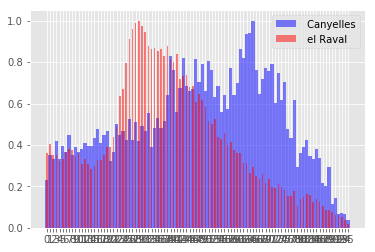

In [200]:
# generate plot
# df_age_bars_norm.index = df_age_bars_norm.index.map(int) # let's change the index values of df_top5 to type integer for plotting
# df_age_bars_norm.plot(kind='bar', 
#             stacked=False,
#             figsize=(20, 10), # pass a tuple (x, y) size
#             )
indices = ages
width = 1

plt.bar(ages, df_age_bars_norm.iloc[0,1:], width=width, 
        color='b',alpha=0.5, label=df_age_bars.iloc[0,0])
plt.bar(ages, df_age_bars_norm.iloc[1,1:],
        width=0.5*width, color='r', alpha=0.5, label=df_age_bars.iloc[1,0])

plt.legend()

plt.show()

In [0]:
# unify neighborhoods with same code
df = df.groupby(['PostalCode', 'Borough'], sort=True).agg( ', '.join)

# the index should be restored after deleting and merging rows from the dataframe
df = df.reset_index()
df.head()

In [1]:
# The code was removed by Watson Studio for sharing.

#### Nationality

locals vs foreigners. word cloud. 


In [0]:
# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

total_immigration = df_can['Total'].sum()

# Using countries with single-word names, let's duplicate each country's name based on how much they contribute to the total immigration.
max_words = 90
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [0]:
### Choropleth
!conda install -c conda-forge folium=0.5.0 --yes
import folium

world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

world_geo = r'world_countries.json'

# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df_can['Total'].min(),
                              df_can['Total'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada',
    reset=True
)
world_map

#### Elections

left, right and center. Pie chart.

#### Unemployment

left, right and center. Pie chart.

### Foursquare
Now that we have our location candidates, let's use Foursquare API to get info on restaurants in each neighborhood.

We're interested in venues in 'food' category, but only those that are proper restaurants - coffe shops, pizza places, bakeries etc. are not direct competitors so we don't care about those. So we will include in out list only venues that have 'restaurant' in category name, and we'll make sure to detect and include all the subcategories of specific 'Italian restaurant' category, as we need info on Italian restaurants in the neighborhood.

In [0]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add postal code column back to dataframe
toronto_onehot['PostalCode'] = toronto_venues['PostalCode'] 

# move postal code column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_grouped = toronto_onehot.groupby('PostalCode').mean().reset_index()
toronto_grouped


num_top_venues = 5

for code in toronto_grouped['PostalCode']:
    print("----"+code+"----")
    temp = toronto_grouped[toronto_grouped['PostalCode'] == code].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
    
# function to sort the venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

# Now let's create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['PostalCode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
df_venues_sorted = pd.DataFrame(columns=columns)
df_venues_sorted['PostalCode'] = toronto_grouped['PostalCode']

for ind in np.arange(toronto_grouped.shape[0]):
    df_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

df_venues_sorted.head()

Foursquare credentials are defined in hidden cell bellow.

In [17]:
# @hidden_cell
CLIENT_ID = 'HK3SANSRHK2CLDTN5LSQB0EWT4TPWNGJNAHO13OBNRHGMRON' # your Foursquare ID
CLIENT_SECRET = 'LNY5CETKEM4DAQMFHMNAJRPFMNJX0CWB44RVOT32IKZQDJZT' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [18]:
# Category IDs corresponding to Italian restaurants were taken from Foursquare web site (https://developer.foursquare.com/docs/resources/categories):

food_category = '4d4b7105d754a06374d81259' # 'Root' category for all food-related venues

italian_restaurant_categories = ['4bf58dd8d48988d110941735','55a5a1ebe4b013909087cbb6','55a5a1ebe4b013909087cb7c',
                                 '55a5a1ebe4b013909087cba7','55a5a1ebe4b013909087cba1','55a5a1ebe4b013909087cba4',
                                 '55a5a1ebe4b013909087cb95','55a5a1ebe4b013909087cb89','55a5a1ebe4b013909087cb9b',
                                 '55a5a1ebe4b013909087cb98','55a5a1ebe4b013909087cbbf','55a5a1ebe4b013909087cb79',
                                 '55a5a1ebe4b013909087cbb0','55a5a1ebe4b013909087cbb3','55a5a1ebe4b013909087cb74',
                                 '55a5a1ebe4b013909087cbaa','55a5a1ebe4b013909087cb83','55a5a1ebe4b013909087cb8c',
                                 '55a5a1ebe4b013909087cb92','55a5a1ebe4b013909087cb8f','55a5a1ebe4b013909087cb86',
                                 '55a5a1ebe4b013909087cbb9','55a5a1ebe4b013909087cb7f','55a5a1ebe4b013909087cbbc',
                                 '55a5a1ebe4b013909087cb9e','55a5a1ebe4b013909087cbc2','55a5a1ebe4b013909087cbad']

def is_restaurant(categories, specific_filter=None):
    restaurant_words = ['restaurant', 'diner', 'taverna', 'steakhouse']
    restaurant = False
    specific = False
    for c in categories:
        category_name = c[0].lower()
        category_id = c[1]
        for r in restaurant_words:
            if r in category_name:
                restaurant = True
        if 'fast food' in category_name:
            restaurant = False
        if not(specific_filter is None) and (category_id in specific_filter):
            specific = True
            restaurant = True
    return restaurant, specific

def get_categories(categories):
    return [(cat['name'], cat['id']) for cat in categories]

def format_address(location):
    address = ', '.join(location['formattedAddress'])
    address = address.replace(', Deutschland', '')
    address = address.replace(', Germany', '')
    return address

def get_venues_near_location(lat, lon, category, client_id, client_secret, radius=500, limit=100):
    version = '20180724'
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
        client_id, client_secret, version, lat, lon, category, radius, limit)
    try:
        results = requests.get(url).json()['response']['groups'][0]['items']
        venues = [(item['venue']['id'],
                   item['venue']['name'],
                   get_categories(item['venue']['categories']),
                   (item['venue']['location']['lat'], item['venue']['location']['lng']),
                   format_address(item['venue']['location']),
                   item['venue']['location']['distance']) for item in results]        
    except:
        venues = []
    return venues

In [19]:
# Let's now go over our neighborhood locations and get nearby restaurants; we'll also maintain a dictionary of all found restaurants and all found italian restaurants

import pickle

def get_restaurants(lats, lons):
    restaurants = {}
    italian_restaurants = {}
    location_restaurants = []

    print('Obtaining venues around candidate locations:', end='')
    for lat, lon in zip(lats, lons):
        # Using radius=350 to meke sure we have overlaps/full coverage so we don't miss any restaurant (we're using dictionaries to remove any duplicates resulting from area overlaps)
        venues = get_venues_near_location(lat, lon, food_category, foursquare_client_id, foursquare_client_secret, radius=350, limit=100)
        area_restaurants = []
        for venue in venues:
            venue_id = venue[0]
            venue_name = venue[1]
            venue_categories = venue[2]
            venue_latlon = venue[3]
            venue_address = venue[4]
            venue_distance = venue[5]
            is_res, is_italian = is_restaurant(venue_categories, specific_filter=italian_restaurant_categories)
            if is_res:
                x, y = lonlat_to_xy(venue_latlon[1], venue_latlon[0])
                restaurant = (venue_id, venue_name, venue_latlon[0], venue_latlon[1], venue_address, venue_distance, is_italian, x, y)
                if venue_distance<=300:
                    area_restaurants.append(restaurant)
                restaurants[venue_id] = restaurant
                if is_italian:
                    italian_restaurants[venue_id] = restaurant
        location_restaurants.append(area_restaurants)
        print(' .', end='')
    print(' done.')
    return restaurants, italian_restaurants, location_restaurants

# Try to load from local file system in case we did this before
restaurants = {}
italian_restaurants = {}
location_restaurants = []
loaded = False
try:
    with open('restaurants_350.pkl', 'rb') as f:
        restaurants = pickle.load(f)
    with open('italian_restaurants_350.pkl', 'rb') as f:
        italian_restaurants = pickle.load(f)
    with open('location_restaurants_350.pkl', 'rb') as f:
        location_restaurants = pickle.load(f)
    print('Restaurant data loaded.')
    loaded = True
except:
    pass

# If load failed use the Foursquare API to get the data
if not loaded:
    restaurants, italian_restaurants, location_restaurants = get_restaurants(latitudes, longitudes)
    
    # Let's persists this in local file system
    with open('restaurants_350.pkl', 'wb') as f:
        pickle.dump(restaurants, f)
    with open('italian_restaurants_350.pkl', 'wb') as f:
        pickle.dump(italian_restaurants, f)
    with open('location_restaurants_350.pkl', 'wb') as f:
        pickle.dump(location_restaurants, f)
        

Obtaining venues around candidate locations: . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . done.


In [20]:
import numpy as np

print('Total number of restaurants:', len(restaurants))
print('Total number of Italian restaurants:', len(italian_restaurants))
print('Percentage of Italian restaurants: {:.2f}%'.format(len(italian_restaurants) / len(restaurants) * 100))
print('Average number of restaurants in neighborhood:', np.array([len(r) for r in location_restaurants]).mean())

Total number of restaurants: 2031
Total number of Italian restaurants: 312
Percentage of Italian restaurants: 15.36%
Average number of restaurants in neighborhood: 4.91208791209


In [21]:
print('List of all restaurants')
print('-----------------------')
for r in list(restaurants.values())[:10]:
    print(r)
print('...')
print('Total:', len(restaurants))

List of all restaurants
-----------------------
('5546072a498e349bf0e737e1', 'Shaam Restaurant', 52.474363806181806, 13.440120220184326, 'Karl-Marx-Straße 177, 10247 Berlin', 249, False, 394052.35775333317, 5814944.355430137)
('4fce25c6e4b0f39fffdd0447', 'Wursterei', 52.5058278495275, 13.333072532529153, 'Hardenbergplatz 27d, 10623 Berlin', 133, False, 386862.9315917266, 5818606.191572046)
('57ffdde438fa512462a6b490', 'Einstein Kaffeehaus & Restaurant', 52.516953, 13.385849, 'Unter der Linden 42, 10117 Berlin', 69, False, 390472.37417370133, 5819762.151308152)
('514316eae4b080a105a5b4f5', 'Allee Bistro', 52.534855836549994, 13.497241138618675, 'Berlin', 279, False, 398071.8391866421, 5821590.182515125)
('4c3a05951a38ef3b86079321', 'Louis', 52.474274260971214, 13.445097179795765, 'Richardplatz 5, 12055 Berlin', 158, False, 394390.1589999274, 5814927.10762019)
('4b62bc3df964a520b4502ae3', 'Kaplan Döner', 52.556723244788124, 13.373655087007442, 'Osloer Str. 84, Berlin', 248, False, 389744

In [22]:
print('List of Italian restaurants')
print('---------------------------')
for r in list(italian_restaurants.values())[:10]:
    print(r)
print('...')
print('Total:', len(italian_restaurants))

List of Italian restaurants
---------------------------
('4b4f6063f964a520e10327e3', 'Salumeria Culinario', 52.526394678482745, 13.393537136029817, 'Tucholskystr. 34 (Auguststr.), 10117 Berlin', 123, True, 391017.3861974631, 5820800.631260842)
('56d5838e498eda2c7124a8f0', 'Pascarella', 52.53224028238963, 13.380982905663293, 'Berlin', 168, True, 390180.3491140888, 5821469.816676741)
('4f1ff655e4b0ec749c54b273', 'Agata Torrisi', 52.53651019364004, 13.377780874234496, 'Wöhlertstr. 5, 10115 Berlin', 121, True, 389973.84217276424, 5821949.599236318)
('551ecd4e498e52f76b5f4310', "Antonello's Cevicheria & Street Food", 52.49042751718539, 13.390365472982154, 'Nostitzstr. 22, Berlin', 240, True, 390713.04239021626, 5816805.116119504)
('4bf2dd126991c9b6629829e9', 'Al Contadino Sotto Le Stelle', 52.52780835209213, 13.401225263437848, 'Auguststr. 36 (Joachimstr.), 10115 Berlin', 250, True, 391542.39733332, 5820946.282045525)
('4afc5179f964a5207e2122e3', 'Boccondivino', 52.522249160938536, 13.38431

In [23]:
print('Restaurants around location')
print('---------------------------')
for i in range(100, 110):
    rs = location_restaurants[i][:8]
    names = ', '.join([r[1] for r in rs])
    print('Restaurants around location {}: {}'.format(i+1, names))

Restaurants around location
---------------------------
Restaurants around location 101: Mabuhay, Scandic Restaurant
Restaurants around location 102: Solar, THE POST Brasserie & Bar, Ristorante Marinelli, Diomira, Mexican, Cucina Italiana, Restaurant Hof zwei, Morélos Steakhaus & Cocktailbar
Restaurants around location 103: Paracas, Nobelhart & Schmutzig, Mama Cook, Trattoria da Vinci, Steakhaus Asador, Tumi, Delhi 6, Deutsche Küche By Kaese-koenig.de
Restaurants around location 104: 
Restaurants around location 105: Pacifico, food bag 2, TAT Imbiss
Restaurants around location 106: Santa Maria, Die Henne, Zur kleinen Markthalle, Parantez, Habibi, Maroush, Sol y Sombra, Chez Michel
Restaurants around location 107: La Piadina, 3 Schwestern, Trattoria Marechiaro, Goldener Hahn, Weltrestaurant Markthalle, Long March Canteen, Olive
Restaurants around location 108: Salumeria Lamuri, Restaurant Richard
Restaurants around location 109: Scheers Schnitzel, Seoulkitchen Korean BBQ & Sushi, Michel

Let's now see all the collected restaurants in our area of interest on map, and let's also show Italian restaurants in different color.

In [29]:
map_berlin = folium.Map(location=berlin_center, zoom_start=13)
folium.Marker(berlin_center, popup='Alexanderplatz').add_to(map_berlin)
for res in restaurants.values():
    lat = res[2]; lon = res[3]
    is_italian = res[6]
    color = 'red' if is_italian else 'blue'
    folium.CircleMarker([lat, lon], radius=3, color=color, fill=True, fill_color=color, fill_opacity=1).add_to(map_berlin)
map_berlin

Looking good. So now we have all the restaurants in area within few kilometers from Alexanderplatz, and we know which ones are Italian restaurants! We also know which restaurants exactly are in vicinity of every neighborhood candidate center.

This concludes the data gathering phase - we're now ready to use this data for analysis to produce the report on optimal locations for a new Italian restaurant!

## Methodology <a name="methodology"></a>

In this project we will direct our efforts on detecting areas of Berlin that have low restaurant density, particularly those with low number of Italian restaurants. We will limit our analysis to area ~6km around city center.

In first step we have collected the required **data: location and type (category) of every restaurant within 6km from Berlin center** (Alexanderplatz). We have also **identified Italian restaurants** (according to Foursquare categorization).

Second step in our analysis will be calculation and exploration of '**restaurant density**' across different areas of Berlin - we will use **heatmaps** to identify a few promising areas close to center with low number of restaurants in general (*and* no Italian restaurants in vicinity) and focus our attention on those areas.

In third and final step we will focus on most promising areas and within those create **clusters of locations that meet some basic requirements** established in discussion with stakeholders: we will take into consideration locations with **no more than two restaurants in radius of 250 meters**, and we want locations **without Italian restaurants in radius of 400 meters**. We will present map of all such locations but also create clusters (using **k-means clustering**) of those locations to identify general zones / neighborhoods / addresses which should be a starting point for final 'street level' exploration and search for optimal venue location by stakeholders.

## Analysis 2

Let's perform some basic explanatory data analysis and derive some additional info from our raw data. First let's count the **number of restaurants in every area candidate**:

In [31]:
location_restaurants_count = [len(res) for res in location_restaurants]

df_locations['Restaurants in area'] = location_restaurants_count

print('Average number of restaurants in every area with radius=300m:', np.array(location_restaurants_count).mean())

df_locations.head(10)

Average number of restaurants in every area with radius=300m: 4.91208791209


,Address,Distance from center,Latitude,Longitude,X,Y,Restaurants in area
0,"Bundesautobahn 100 & Tempelhofer Damm, 12099 B...",5992.495307,52.470194,13.388575,390541.280176,5.814557e+06,4
1,"09R/27L, 12101 Berlin",5840.376700,52.470314,13.397404,391141.280176,5.814557e+06,0
2,"09R/27L, 12049 Berlin",5747.173218,52.470434,13.406234,391741.280176,5.814557e+06,0
3,"09R/27L, 12049 Berlin",5715.767665,52.470552,13.415063,392341.280176,5.814557e+06,0
4,"Warthestraße 23, 12051 Berlin",5747.173218,52.470670,13.423893,392941.280176,5.814557e+06,1
5,"Schierker Str. 19-20, 12051 Berlin",5840.376700,52.470788,13.432722,393541.280176,5.814557e+06,6
6,"Karl-Marx-Straße 213, 12055 Berlin",5992.495307,52.470904,13.441552,394141.280176,5.814557e+06,5
7,"Hessenring 34, 12101 Berlin",5855.766389,52.474683,13.375159,389641.280176,5.815077e+06,0
8,"Thuyring 6, 12101 Berlin",5604.462508,52.474804,13.383989,390241.280176,5.815077e+06,0
9,"09L/27R, 12101 Berlin",5408.326913,52.474924,13.392820,390841.280176,5.815077e+06,0


OK, now let's calculate the **distance to nearest Italian restaurant from every area candidate center** (not only those within 300m - we want distance to closest one, regardless of how distant it is).

In [32]:
distances_to_italian_restaurant = []

for area_x, area_y in zip(xs, ys):
    min_distance = 10000
    for res in italian_restaurants.values():
        res_x = res[7]
        res_y = res[8]
        d = calc_xy_distance(area_x, area_y, res_x, res_y)
        if d<min_distance:
            min_distance = d
    distances_to_italian_restaurant.append(min_distance)

df_locations['Distance to Italian restaurant'] = distances_to_italian_restaurant

In [33]:
df_locations.head(10)

,Address,Distance from center,Latitude,Longitude,X,Y,Restaurants in area,Distance to Italian restaurant
0,"Bundesautobahn 100 & Tempelhofer Damm, 12099 B...",5992.495307,52.470194,13.388575,390541.280176,5.814557e+06,4,264.408532
1,"09R/27L, 12101 Berlin",5840.376700,52.470314,13.397404,391141.280176,5.814557e+06,0,830.999331
2,"09R/27L, 12049 Berlin",5747.173218,52.470434,13.406234,391741.280176,5.814557e+06,0,1269.038823
3,"09R/27L, 12049 Berlin",5715.767665,52.470552,13.415063,392341.280176,5.814557e+06,0,829.067436
4,"Warthestraße 23, 12051 Berlin",5747.173218,52.470670,13.423893,392941.280176,5.814557e+06,1,575.681166
5,"Schierker Str. 19-20, 12051 Berlin",5840.376700,52.470788,13.432722,393541.280176,5.814557e+06,6,293.966217
6,"Karl-Marx-Straße 213, 12055 Berlin",5992.495307,52.470904,13.441552,394141.280176,5.814557e+06,5,317.390305
7,"Hessenring 34, 12101 Berlin",5855.766389,52.474683,13.375159,389641.280176,5.815077e+06,0,776.047531
8,"Thuyring 6, 12101 Berlin",5604.462508,52.474804,13.383989,390241.280176,5.815077e+06,0,378.018237
9,"09L/27R, 12101 Berlin",5408.326913,52.474924,13.392820,390841.280176,5.815077e+06,0,635.252552


OK, so **on average Italian restaurant can be found within ~500m** from every area center candidate. That's fairly close, so we need to filter our areas carefully!

Let's crete a map showing **heatmap / density of restaurants** and try to extract some meaningfull info from that. Also, let's show **borders of Berlin boroughs** on our map and a few circles indicating distance of 1km, 2km and 3km from Alexanderplatz.

In [36]:
berlin_boroughs_url = 'https://raw.githubusercontent.com/m-hoerz/berlin-shapes/master/berliner-bezirke.geojson'
berlin_boroughs = requests.get(berlin_boroughs_url).json()

def boroughs_style(feature):
    return { 'color': 'blue', 'fill': False }

In [37]:
restaurant_latlons = [[res[2], res[3]] for res in restaurants.values()]

italian_latlons = [[res[2], res[3]] for res in italian_restaurants.values()]

In [38]:
from folium import plugins
from folium.plugins import HeatMap

map_berlin = folium.Map(location=berlin_center, zoom_start=13)
folium.TileLayer('cartodbpositron').add_to(map_berlin) #cartodbpositron cartodbdark_matter
HeatMap(restaurant_latlons).add_to(map_berlin)
folium.Marker(berlin_center).add_to(map_berlin)
folium.Circle(berlin_center, radius=1000, fill=False, color='white').add_to(map_berlin)
folium.Circle(berlin_center, radius=2000, fill=False, color='white').add_to(map_berlin)
folium.Circle(berlin_center, radius=3000, fill=False, color='white').add_to(map_berlin)
folium.GeoJson(berlin_boroughs, style_function=boroughs_style, name='geojson').add_to(map_berlin)
map_berlin

Looks like a few pockets of low restaurant density closest to city center can be found **south, south-east and east from Alexanderplatz**. 

Let's create another heatmap map showing **heatmap/density of Italian restaurants** only.

In [39]:
map_berlin = folium.Map(location=berlin_center, zoom_start=13)
folium.TileLayer('cartodbpositron').add_to(map_berlin) #cartodbpositron cartodbdark_matter
HeatMap(italian_latlons).add_to(map_berlin)
folium.Marker(berlin_center).add_to(map_berlin)
folium.Circle(berlin_center, radius=1000, fill=False, color='white').add_to(map_berlin)
folium.Circle(berlin_center, radius=2000, fill=False, color='white').add_to(map_berlin)
folium.Circle(berlin_center, radius=3000, fill=False, color='white').add_to(map_berlin)
folium.GeoJson(berlin_boroughs, style_function=boroughs_style, name='geojson').add_to(map_berlin)
map_berlin

This map is not so 'hot' (Italian restaurants represent a subset of ~15% of all restaurants in Berlin) but it also indicates higher density of existing Italian restaurants directly north and west from Alexanderplatz, with closest pockets of **low Italian restaurant density positioned east, south-east and south from city center**.

Based on this we will now focus our analysis on areas *south-west, south, south-east and east from Berlin center* - we will move the center of our area of interest and reduce it's size to have a radius of **2.5km**. This places our location candidates mostly in boroughs **Kreuzberg and Friedrichshain** (another potentially interesting borough is **Prenzlauer Berg** with large low restaurant density north-east from city center, however this borough is less interesting to stakeholders as it's mostly residental and less popular with tourists).

OK. Let us now **filter** those locations: we're interested only in **locations with no more than two restaurants in radius of 250 meters**, and **no Italian restaurants in radius of 400 meters**.

In [98]:
good_res_count = np.array((df_roi_locations['Restaurants nearby']<=2))
print('Locations with no more than two restaurants nearby:', good_res_count.sum())

good_ita_distance = np.array(df_roi_locations['Distance to Italian restaurant']>=400)
print('Locations with no Italian restaurants within 400m:', good_ita_distance.sum())

good_locations = np.logical_and(good_res_count, good_ita_distance)
print('Locations with both conditions met:', good_locations.sum())

df_good_locations = df_roi_locations[good_locations]


Locations with no more than two restaurants nearby: 798
Locations with no Italian restaurants within 400m: 380
Locations with both conditions met: 319


Let's see how this looks on a map.

In [99]:
good_latitudes = df_good_locations['Latitude'].values
good_longitudes = df_good_locations['Longitude'].values

good_locations = [[lat, lon] for lat, lon in zip(good_latitudes, good_longitudes)]

map_berlin = folium.Map(location=roi_center, zoom_start=14)
folium.TileLayer('cartodbpositron').add_to(map_berlin)
HeatMap(restaurant_latlons).add_to(map_berlin)
folium.Circle(roi_center, radius=2500, color='white', fill=True, fill_opacity=0.6).add_to(map_berlin)
folium.Marker(berlin_center).add_to(map_berlin)
for lat, lon in zip(good_latitudes, good_longitudes):
    folium.CircleMarker([lat, lon], radius=2, color='blue', fill=True, fill_color='blue', fill_opacity=1).add_to(map_berlin) 
folium.GeoJson(berlin_boroughs, style_function=boroughs_style, name='geojson').add_to(map_berlin)
map_berlin

Looking good. We now have a bunch of locations fairly close to Alexanderplatz (mostly in Kreuzberg, Friedrichshain and south-east corner of Mitte boroughs), and we know that each of those locations has no more than two restaurants in radius of 250m, and no Italian restaurant closer than 400m. Any of those locations is a potential candidate for a new Italian restaurant, at least based on nearby competition.

Let's now show those good locations in a form of heatmap:

In [100]:
map_berlin = folium.Map(location=roi_center, zoom_start=14)
HeatMap(good_locations, radius=25).add_to(map_berlin)
folium.Marker(berlin_center).add_to(map_berlin)
for lat, lon in zip(good_latitudes, good_longitudes):
    folium.CircleMarker([lat, lon], radius=2, color='blue', fill=True, fill_color='blue', fill_opacity=1).add_to(map_berlin)
folium.GeoJson(berlin_boroughs, style_function=boroughs_style, name='geojson').add_to(map_berlin)
map_berlin

Looking good. What we have now is a clear indication of zones with low number of restaurants in vicinity, and *no* Italian restaurants at all nearby.

Let us now **cluster** those locations to create **centers of zones containing good locations**. Those zones, their centers and addresses will be the final result of our analysis. 

In [101]:
from sklearn.cluster import KMeans

number_of_clusters = 15

good_xys = df_good_locations[['X', 'Y']].values
kmeans = KMeans(n_clusters=number_of_clusters, random_state=0).fit(good_xys)

cluster_centers = [xy_to_lonlat(cc[0], cc[1]) for cc in kmeans.cluster_centers_]

map_berlin = folium.Map(location=roi_center, zoom_start=14)
folium.TileLayer('cartodbpositron').add_to(map_berlin)
HeatMap(restaurant_latlons).add_to(map_berlin)
folium.Circle(roi_center, radius=2500, color='white', fill=True, fill_opacity=0.4).add_to(map_berlin)
folium.Marker(berlin_center).add_to(map_berlin)
for lon, lat in cluster_centers:
    folium.Circle([lat, lon], radius=500, color='green', fill=True, fill_opacity=0.25).add_to(map_berlin) 
for lat, lon in zip(good_latitudes, good_longitudes):
    folium.CircleMarker([lat, lon], radius=2, color='blue', fill=True, fill_color='blue', fill_opacity=1).add_to(map_berlin)
folium.GeoJson(berlin_boroughs, style_function=boroughs_style, name='geojson').add_to(map_berlin)
map_berlin

Not bad - our clusters represent groupings of most of the candidate locations and cluster centers are placed nicely in the middle of the zones 'rich' with location candidates.

Addresses of those cluster centers will be a good starting point for exploring the neighborhoods to find the best possible location based on neighborhood specifics.

Let's see those zones on a city map without heatmap, using shaded areas to indicate our clusters:

## Results and Discussion <a name="results"></a>

Our analysis shows that although there is a great number of restaurants in Berlin (~2000 in our initial area of interest which was 12x12km around Alexanderplatz), there are pockets of low restaurant density fairly close to city center. Highest concentration of restaurants was detected north and west from Alexanderplatz, so we focused our attention to areas south, south-east and east, corresponding to boroughs Kreuzberg, Friedrichshain and south-east corner of central Mitte borough. Another borough was identified as potentially interesting (Prenzlauer Berg, north-east from Alexanderplatz), but our attention was focused on Kreuzberg and Friedrichshain which offer a combination of popularity among tourists, closeness to city center, strong socio-economic dynamics *and* a number of pockets of low restaurant density.

After directing our attention to this more narrow area of interest (covering approx. 5x5km south-east from Alexanderplatz) we first created a dense grid of location candidates (spaced 100m appart); those locations were then filtered so that those with more than two restaurants in radius of 250m and those with an Italian restaurant closer than 400m were removed.

Those location candidates were then clustered to create zones of interest which contain greatest number of location candidates. Addresses of centers of those zones were also generated using reverse geocoding to be used as markers/starting points for more detailed local analysis based on other factors.

Result of all this is 15 zones containing largest number of potential new restaurant locations based on number of and distance to existing venues - both restaurants in general and Italian restaurants particularly. This, of course, does not imply that those zones are actually optimal locations for a new restaurant! Purpose of this analysis was to only provide info on areas close to Berlin center but not crowded with existing restaurants (particularly Italian) - it is entirely possible that there is a very good reason for small number of restaurants in any of those areas, reasons which would make them unsuitable for a new restaurant regardless of lack of competition in the area. Recommended zones should therefore be considered only as a starting point for more detailed analysis which could eventually result in location which has not only no nearby competition but also other factors taken into account and all other relevant conditions met.

## Conclusion <a name="conclusion"></a>

Purpose of this project was to identify Berlin areas close to center with low number of restaurants (particularly Italian restaurants) in order to aid stakeholders in narrowing down the search for optimal location for a new Italian restaurant. By calculating restaurant density distribution from Foursquare data we have first identified general boroughs that justify further analysis (Kreuzberg and Friedrichshain), and then generated extensive collection of locations which satisfy some basic requirements regarding existing nearby restaurants. Clustering of those locations was then performed in order to create major zones of interest (containing greatest number of potential locations) and addresses of those zone centers were created to be used as starting points for final exploration by stakeholders.

Final decission on optimal restaurant location will be made by stakeholders based on specific characteristics of neighborhoods and locations in every recommended zone, taking into consideration additional factors like attractiveness of each location (proximity to park or water), levels of noise / proximity to major roads, real estate availability, prices, social and economic dynamics of every neighborhood etc.